In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [2]:
path = kagglehub.dataset_download("elakiricoder/gender-classification-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

100%|██████████| 19.0k/19.0k [00:00<00:00, 26.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elakiricoder/gender-classification-dataset/versions/1
['gender_classification_v7.csv']


In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/elakiricoder/gender-classification-dataset/versions/1/gender_classification_v7.csv')

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [6]:
df.shape

(5001, 8)

In [7]:
df.duplicated().sum()

np.int64(1768)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [9]:
x = df.drop('gender', axis=1)
y = df['gender']

In [10]:
df['gender'].value_counts()

,count
gender,
0,2501
1,2500


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier

In [13]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9600399600399601
[[485  17]
 [ 23 476]]


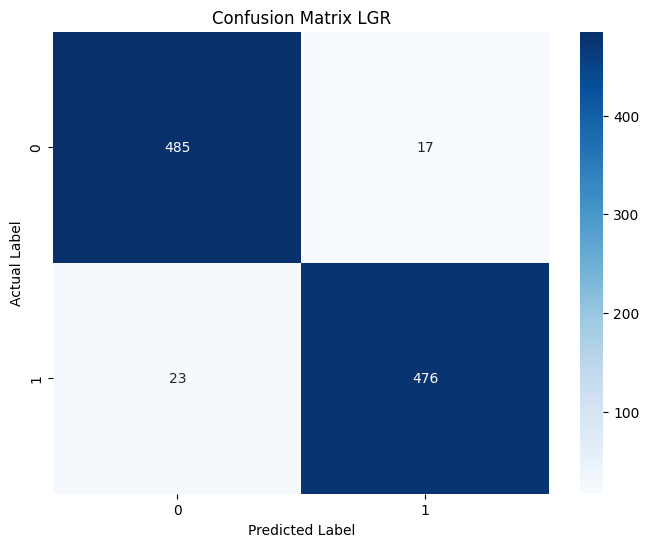

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LGR')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [15]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9590409590409591
[[483  19]
 [ 22 477]]


In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.952047952047952
[[480  22]
 [ 26 473]]


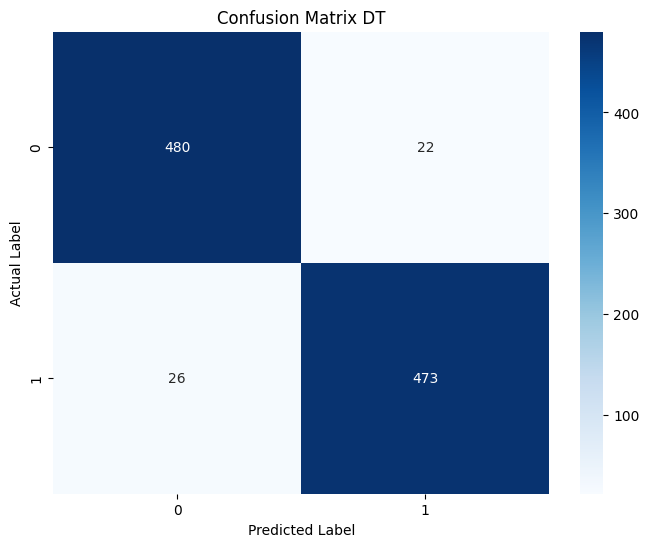

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix DT')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [18]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.962037962037962
[[491  11]
 [ 27 472]]


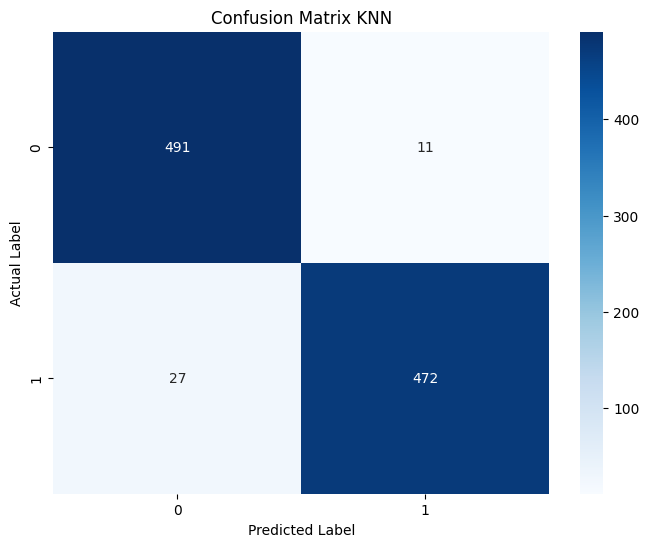

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [20]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9630369630369631
[[486  16]
 [ 21 478]]


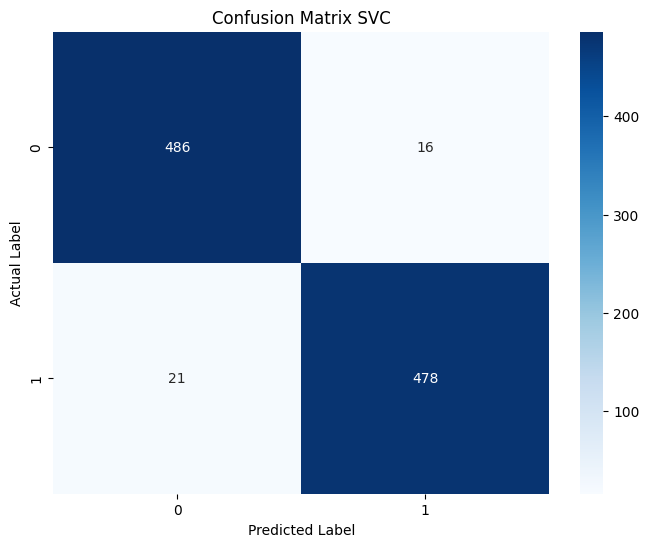

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVC')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [22]:
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)
y_pred = ad.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#

0.962037962037962
[[484  18]
 [ 20 479]]


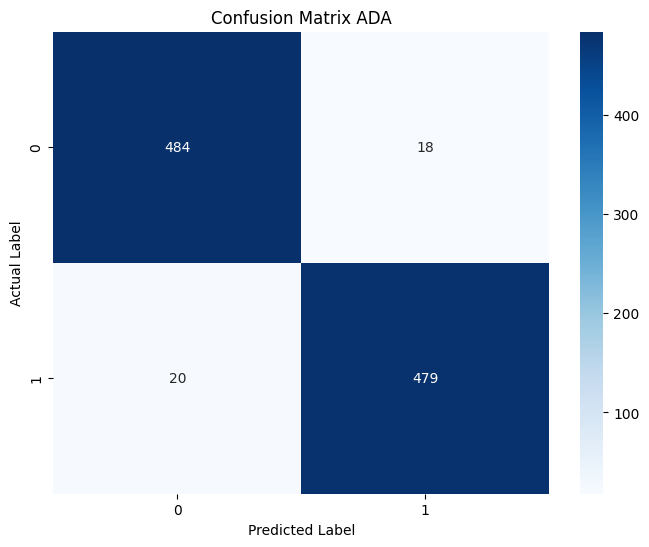

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ADA')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
gd = GradientBoostingClassifier()
gd.fit(x_train, y_train)
y_pred = gd.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#

0.967032967032967
[[492  10]
 [ 23 476]]


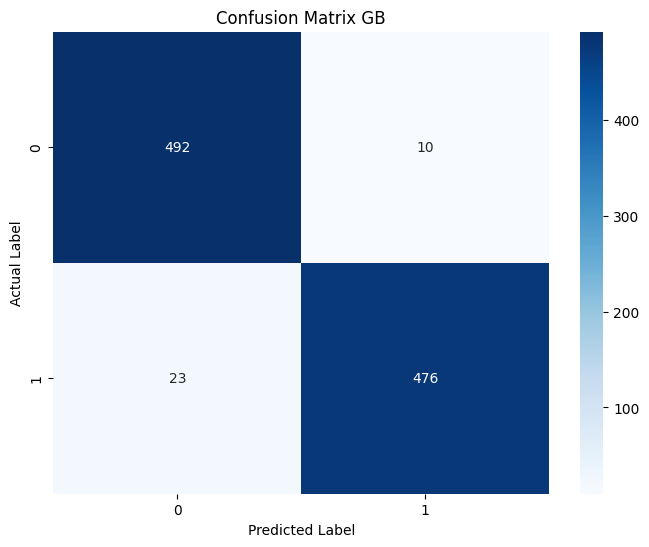

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix GB')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [26]:
base_learners = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svc', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr',LogisticRegression())

]

# Meta learner
meta_learner = KNeighborsClassifier()

# Stacking Classifier
stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=False  # if True, meta learner also gets original features
)

In [27]:
stack.fit(x_train,y_train)
y_pred = stack.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[494   8]
 [ 20 479]]
0.972027972027972


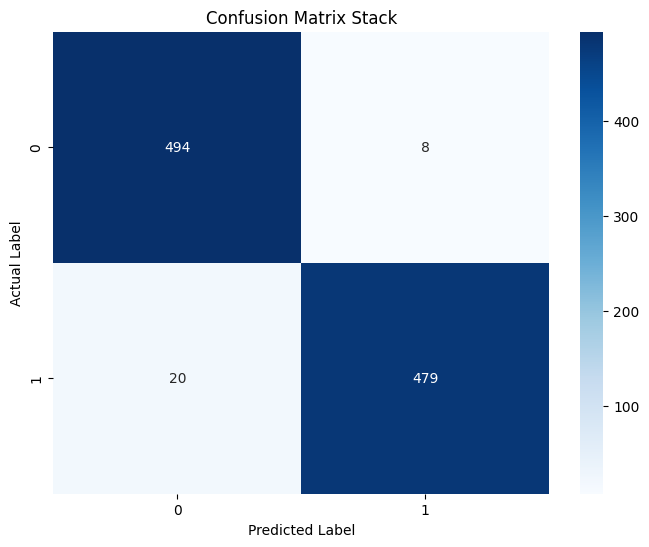

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Stack')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()